In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_mixup = pd.read_csv("../data/d937b.csv", header=None)
df_base = pd.read_csv("../data/66de4.csv", header=None)

df_base_oc = pd.read_csv("../data/bd4e5.csv", header=None)
df_mixup_oc = pd.read_csv("../data/8b613.csv", header=None)

df_base_oc_3 = pd.read_csv("../data/599a1.csv", header=None)
df_mixup_oc_3 = pd.read_csv("../data/41903.csv", header=None)

df_base_oc_2 = pd.read_csv("../data/a88df.csv", header=None)
df_mixup_oc_2 = pd.read_csv("../data/fab8f.csv", header=None)

df_base_oc_1 = pd.read_csv("../data/556ce.csv", header=None)
df_mixup_oc_1 = pd.read_csv("../data/debfe.csv", header=None)


# df_base_oc = pd.read_csv("../data/af63e.csv", header=None)
# df_mixup_oc = pd.read_csv("../data/90790.csv", header=None)

In [3]:
df_base_oc_1

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,6,3,9,5,9,6,6,9,6,1,...,6,6,6,6,6,6,6,6,6,6
1,2,3,2,4,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,8,3,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,6,3,6,4,4,4,6,6,6,4,...,6,6,4,4,6,4,6,4,4,6
4,6,3,6,6,6,6,6,4,6,4,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,4,3,9,7,7,1,3,6,3,6,...,4,5,3,4,3,4,4,4,4,7
1020,5,3,6,5,5,5,5,4,2,5,...,3,5,5,3,5,5,5,5,5,5
1021,4,3,4,4,5,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1022,9,3,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [34]:
def func(df):
    index = []
    for i, row in df.iterrows():
        arr_row = row.to_numpy()
        idx = np.where(arr_row[:-1] != arr_row[1:])[0]
        if idx != []:   
            tmp_idx = np.where(arr_row[:-1] != arr_row[1:])[0][-1]
            if arr_row[tmp_idx+1] == arr_row[0]:
                index.append(np.where(arr_row[:-1] != arr_row[1:])[0][-1])
            else:
                index.append(200)

        else:
            index.append(200)

    return index


In [35]:
base_idx = func(df_base)
mixup_idx = func(df_mixup)

base_idx_oc = func(df_base_oc)
mixup_idx_oc = func(df_mixup_oc)

base_idx_oc_1 = func(df_base_oc_1)
mixup_idx_oc_1 = func(df_mixup_oc_1)
base_idx_oc_2 = func(df_base_oc_2)
mixup_idx_oc_2 = func(df_mixup_oc_2)
base_idx_oc_3 = func(df_base_oc_3)
mixup_idx_oc_3 = func(df_mixup_oc_3)

/home/phelm/anaconda3/envs/m1-base/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/home/phelm/anaconda3/envs/m1-base/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


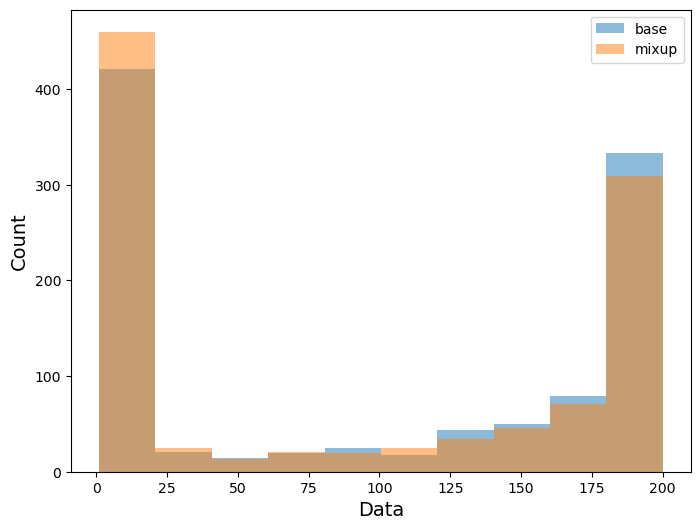

In [36]:
plt.figure(figsize=(8,6))
plt.hist(base_idx_oc, bins=10, alpha=0.5, label="base")
plt.hist(mixup_idx_oc, bins=10, alpha=0.5, label="mixup")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.savefig("test_2.png")

In [37]:
base_mean = [(a+b+c)/3 for a, b, c in zip(base_idx_oc_1, base_idx_oc_2, base_idx_oc_3)]
mixup_mean = [(a+b+c)/3 for a, b, c in zip(mixup_idx_oc_1, mixup_idx_oc_2, mixup_idx_oc_3)]


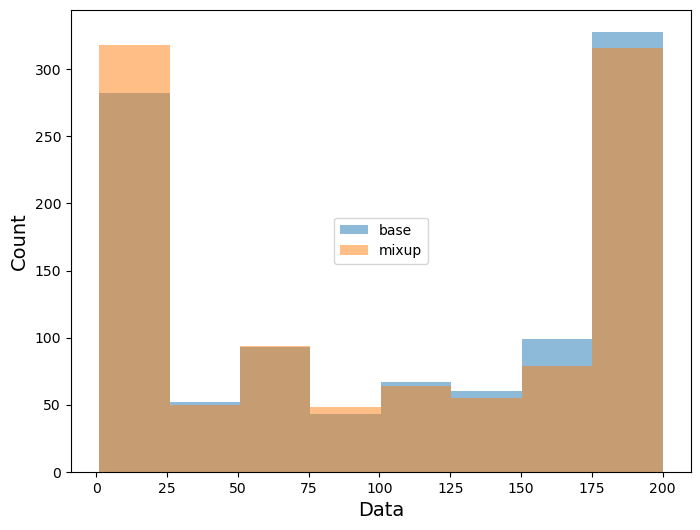

In [38]:
plt.figure(figsize=(8,6))
plt.hist(base_mean, bins=8, alpha=0.5, label="base")
plt.hist(mixup_mean, bins=8, alpha=0.5, label="mixup")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='center')
plt.savefig("test_mean_old.png")

In [26]:
import sys
sys.path.append("..")
from src.datamodules.cifar10_datamodule import CIFAR10DataModule

In [36]:
module = CIFAR10DataModule()
module.prepare_data()
module.setup()
loader = module.train_set_subset_dataloader()

Files already downloaded and verified


In [33]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [59]:
easy_i, hard_i = [], []
for i, (mixup_m, base_m) in enumerate(zip(mixup_mean, base_mean)):
    if mixup_m < 50 and base_m < 50:
        easy_i.append(i)

    if mixup_m > 150 and base_m > 150:
        hard_i.append(i)

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(loader)
images, labels = next(dataiter)


In [ ]:
# EASY Examples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


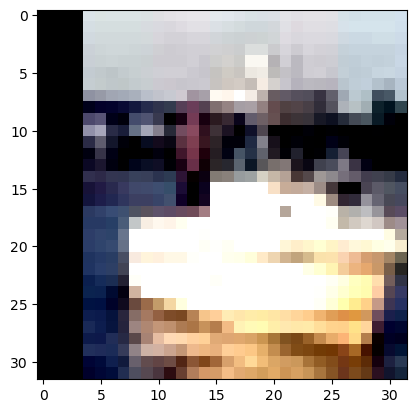

tensor(8)
1.6666666666666667
2.3333333333333335


In [63]:
# show images
i = easy_i[0]
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


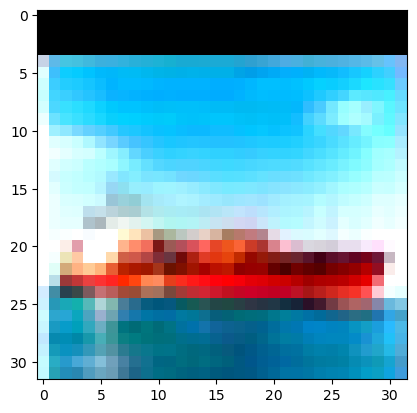

tensor(8)
1.6666666666666667
1.0


In [85]:
# show images
i = easy_i[4]
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


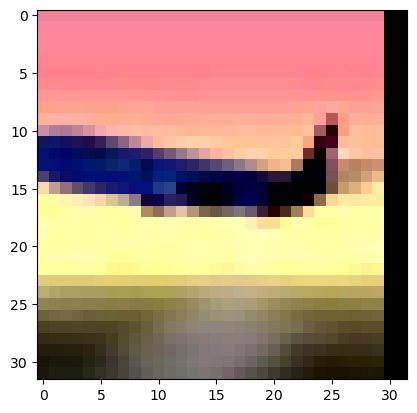

tensor(0)
44.0
36.666666666666664


In [102]:
# show images
i = easy_i[10]
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


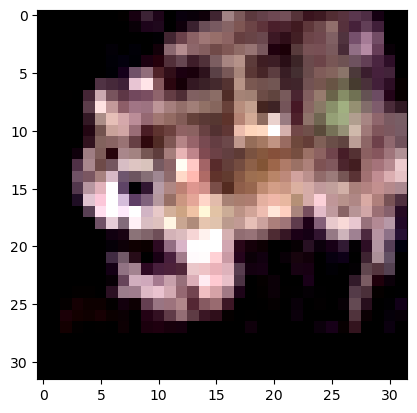

tensor(6)
29.0
9.666666666666666


In [84]:
# show images
i = easy_i[2]
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

In [ ]:
# HARD Examples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


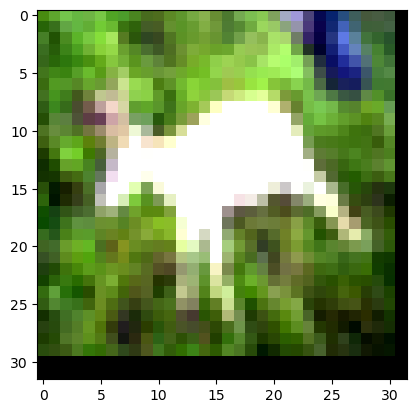

tensor(4)
183.66666666666666
190.33333333333334


In [81]:
# show images
i = hard_i[2]
print(i)
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


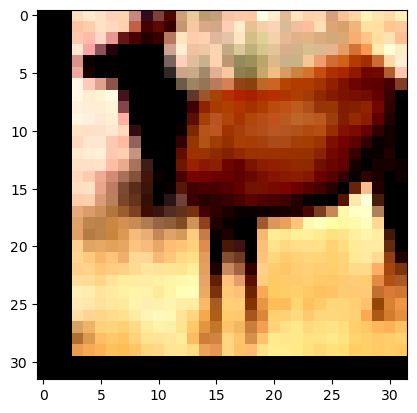

tensor(4)
199.33333333333334
197.66666666666666


In [82]:
# show images
i = hard_i[3]
print(i)
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11


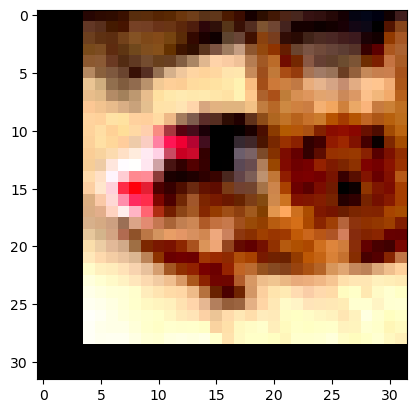

tensor(5)
191.33333333333334
198.66666666666666


In [83]:
# show images
i = hard_i[4]
print(i)
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


28


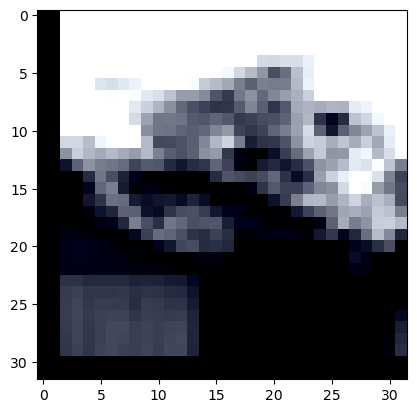

tensor(3)
197.0
198.66666666666666


In [79]:
# show images
i = hard_i[10]
print(i)
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Next steps:
    cifar 100
    nlp

